In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as m
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,auc,precision_recall_curve
#importing the required libraries
#we'll import some other libraries if required as we proceed.

In [64]:
data=pd.read_csv("C:/Users/LENOVO/Desktop/Kaggle Datasets/creditcard.csv")

#reading the .csv file

##### Overview

In [65]:
data.head()

#display first 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
pd.options.display.max_columns=None # to display all the columns without seeing ...
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [67]:
data.tail()

#display last 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [68]:
data.shape

#shape is not a method/function ; it is an attribute of pandas data frame
#(rows,columns)

(284807, 31)

In [69]:
print("Number of rows : ",data.shape[0])
print("Number of columns : ",data.shape[1])

Number of rows :  284807
Number of columns :  31


In [70]:
data.info()

#to get some information regarding our dataset
#total no. of rows,columns,no. of non null values,datatype of each column,memory requirement etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [71]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##### Checking for Null (NaN) values

In [72]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [73]:
data.isnull().sum()
# 0 means we do not have any null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### Removing Unwanted Columns

In [74]:
data.drop(["Time"],axis=1,inplace=True)

##### Scaling the required Columns/Features of our Dataset

In [75]:
#in our data set, 'V1 to V28' are in similiar range
#But the 'Amount' column values are not in the above range. So, we'll use StandardScaler for scaling.

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data["Amount"]=sc.fit_transform(pd.DataFrame(data["Amount"]))

In [76]:
data["Amount"]

#we can see that the 'Amount' column has been scaled

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [77]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [78]:
data.shape

(284807, 30)

##### Checking for Duplicates & Removing them

In [79]:
data.duplicated().any()

#True means our data has duplicate values

True

In [80]:
data.drop_duplicates(inplace=True)

#dropping duplicate values

In [81]:
data.shape

(275663, 30)

In [82]:
print("Number of Duplicate Transactions: ",284807-275663)

Number of Duplicate Transactions:  9144


##### Looking at our Target Variable

<Axes: xlabel='Class'>

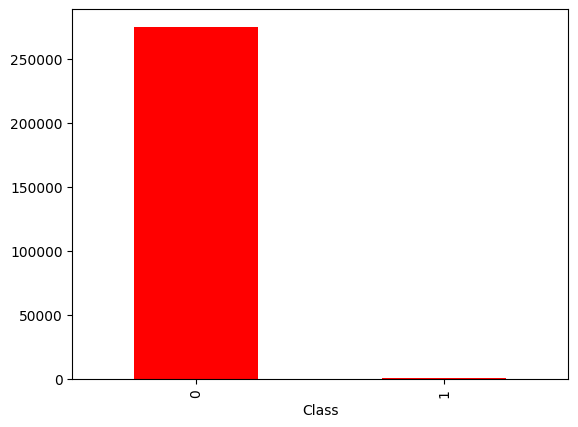

In [83]:
data["Class"].value_counts().plot(kind="bar",color="red")

#Here, we see that our target variable class is very imbalanced
#Imbalanced Data: means that our target variable class has uneven distribution of observations
#0 has a high no. of obs. and 1 has very less no. of observations.
#We need to handle the imbalanced data using [Undersampling or Oversampling]

## Without Handling Imbalanced Data

In [84]:
y=data["Class"]
x=data.drop("Class",axis=1)

In [85]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 275663, dtype: int64

In [86]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [87]:
from sklearn.model_selection import train_test_split

# train_test_split function returns 4 different values. So, we store it in 4 different variables
# Syntax: var1,var2,var3,var4=train_test_split(predictors_var,target_var,test_size=,random_state=)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

#random_state=(some random number) can help us repeat the same split if we store the same number in random_state at any time

In [88]:
from sklearn.linear_model import LogisticRegression

logr=LogisticRegression() #to initialize the instance of LogisticRegression class in logr

logr.fit(x_train,y_train) # training our logr model using the train data

y_pred=logr.predict(x_test) # testing our model using x_test data (to which our model is unfamiliar) and storing the outcome in a new variable y_pred

# Now, we'll compare values of y_pred with y_test
# if y_pred equals(or, is as close as possible) to y_test, it means that our model predicted the outcome very well

In [89]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
y_test

275693    0
94607     0
283229    0
56997     0
33012     0
         ..
29822     0
191419    0
45549     0
283478    0
46513     0
Name: Class, Length: 55133, dtype: int64

In [91]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",round(accuracy,4))

Accuracy: 0.9992


In [129]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[55035     7]
 [   36    55]]


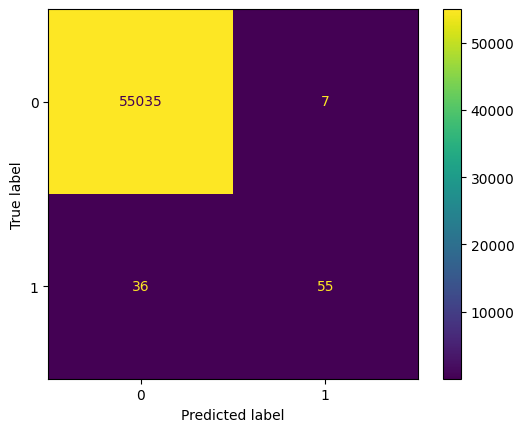

In [130]:
cm_display=m.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[0,1])
cm_display.plot()

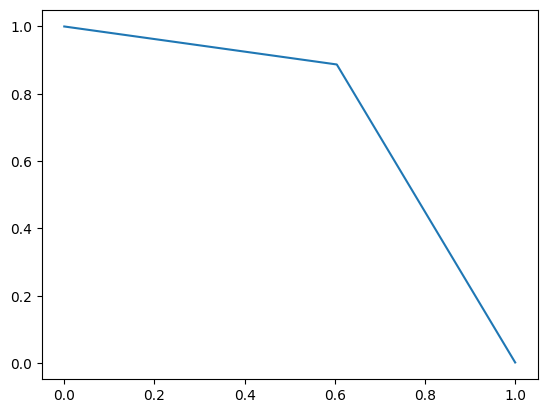

In [94]:
precision,recall,thresholds=precision_recall_curve(y_test,y_pred)
plt.plot(recall,precision)

In [95]:
auc(recall,precision)

0.7460726725260349

In [96]:
precision_score(y_test,y_pred)

0.8870967741935484

In [97]:
recall_score(y_test,y_pred)

0.6043956043956044

In [98]:
f1_score(y_test,y_pred)

0.718954248366013

In [99]:
#or,
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#we see that without balancing the data, the precision,recall,f1_score of class 1 is not at par with class 0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.89      0.60      0.72        91

    accuracy                           1.00     55133
   macro avg       0.94      0.80      0.86     55133
weighted avg       1.00      1.00      1.00     55133



## Handling Imbalanced Dataset (using Undersampling)

In [100]:
normal_transaction=data[data["Class"]==0]
fraud=data[data["Class"]==1]

In [101]:
normal_transaction.shape

(275190, 30)

In [102]:
fraud.shape

(473, 30)

In [103]:
normal=normal_transaction.sample(n=473)

#selecting n=473 samples randomly from the normal_transaction and storing it in a new variable normal
#Now, we have same number of observations in normal and fraud i.e; our data is balanced
#This is called Undersampling.

In [104]:
normal.shape

(473, 30)

In [105]:
undersampled_data=pd.concat([normal,fraud],ignore_index=True)

#concating the data into a single dataset named undersampled_data

In [106]:
undersampled_data["Class"].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [107]:
undersampled_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2.030079,0.002342,-1.838416,0.237208,0.565877,-0.315826,0.009916,0.005273,0.389343,-0.194242,0.755005,0.275407,-0.871242,-0.479361,-0.325732,0.586404,0.220029,0.310320,0.389188,-0.184318,-0.333071,-0.942361,0.300855,0.101935,-0.295760,0.180475,-0.071001,-0.044959,-0.317287,0
1,-1.618216,0.844414,1.753274,0.817882,0.612106,-0.127137,0.764972,-0.378228,-0.066946,1.312237,1.787590,0.004320,-1.044875,0.084604,1.127222,-0.768812,-0.115189,0.097689,0.675664,0.126940,-0.025947,0.463561,-0.478881,0.235309,0.326745,-0.226299,-0.428576,-0.059388,-0.243282,0
2,-1.094178,-0.327254,1.428288,0.945171,1.791648,-0.129554,-0.525985,0.220770,-0.239822,-0.253998,-1.475888,0.195166,1.415146,-0.243697,1.075145,0.132694,-0.740012,0.802158,0.586437,0.442389,0.351026,0.787153,-0.144114,0.111459,0.131521,-0.368125,0.159028,0.181567,-0.349231,0
3,1.985989,-0.486163,-2.650506,-0.660822,2.389784,3.346627,-0.400297,0.773335,0.438105,0.062040,-0.080297,0.411097,-0.258773,0.468004,0.210282,-0.325621,-0.267059,-0.997417,0.072240,-0.091840,-0.233298,-0.694786,0.295870,0.715162,-0.171997,0.293926,-0.060779,-0.064431,-0.212177,0
4,-1.062900,1.152637,-0.935098,-0.272769,0.596246,-1.187275,1.505235,-0.751298,0.798179,0.487139,-0.373172,-0.172696,0.446283,-1.474717,0.807114,-0.041570,0.169881,0.574719,-0.135987,-0.061757,0.064419,1.041334,-0.073848,-0.154131,-0.191925,-0.182236,0.025431,0.153304,-0.005596,0


In [108]:
y_under=undersampled_data["Class"]
x_under=undersampled_data.drop("Class",axis=1)

In [109]:
x_train_under,x_test_under,y_train_under,y_test_under=train_test_split(x_under,y_under,test_size=0.20,random_state=42)

In [110]:
logr=LogisticRegression() #to initialize the instance of LogisticRegression class in logr

logr.fit(x_train_under,y_train_under) # training our logr model using the train data

y_pred_under=logr.predict(x_test_under)

In [111]:
accuracy_under=accuracy_score(y_test_under,y_pred_under)
print("Accuracy:",round(accuracy_under,4))

Accuracy: 0.9316


In [112]:
precision_score(y_test_under,y_pred_under)

0.9587628865979382

In [113]:
recall_score(y_test_under,y_pred_under)

0.9117647058823529

In [114]:
f1_score(y_test_under,y_pred_under)

0.9346733668341709

In [119]:
print(classification_report(y_test_under,y_pred_under))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        88
           1       0.96      0.91      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



In [126]:
confusion_matrix_under=m.confusion_matrix(y_test_under,y_pred_under)
print(confusion_matrix_under)

[[84  4]
 [ 9 93]]


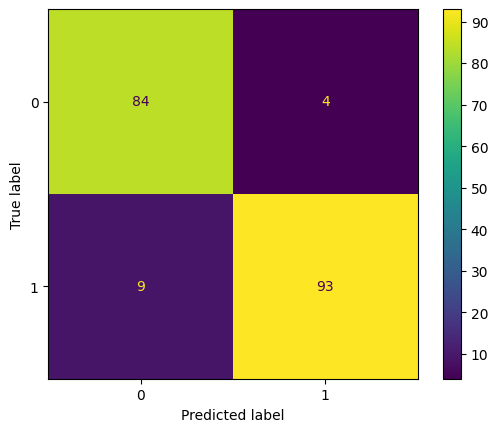

In [127]:
cm_display_u=m.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_under,display_labels=[0,1])
cm_display_u.plot()

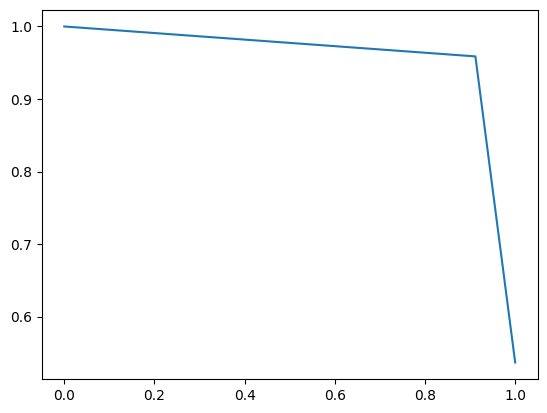

In [131]:
precision_u,recall_u,thresholds_u=precision_recall_curve(y_test_under,y_pred_under)
plt.plot(recall_u,precision_u)

In [132]:
auc(recall_u,precision_u)

0.9589480067664614

## Handling Imbalanced Dataset (using Oversampling)

In [133]:
from imblearn.over_sampling import SMOTE

# SMOTE : Synthetic Minority Oversampling Technique
# Here, we increase the observations in minority class by creating datapoints slightly different but close to actual values... 
#... already present in minority class by linear interpolation.

In [134]:
y=data["Class"]
x=data.drop("Class",axis=1)
x_over,y_over=SMOTE().fit_resample(x,y)

#Syntax: new_independent_var, new_dependent_var = SMOTE().fit_resample(independent_var, dependent_var)

In [135]:
y_over.value_counts()

#Now, we have same number of observations in both calss 0 and 1
#Now, our data is balanced

Class
0    275190
1    275190
Name: count, dtype: int64

In [136]:
x_train_over,x_test_over,y_train_over,y_test_over=train_test_split(x_over,y_over,test_size=0.20,random_state=42)

In [137]:
logr=LogisticRegression() #to initialize the instance of LogisticRegression class in logr

logr.fit(x_train_over,y_train_over) # training our logr model using the train data

y_pred_over=logr.predict(x_test_over)

#y_pred_over=logr.predict_proba(x_test_over)[:,1]>=0.9       #for threshhold 0.9

In [138]:
accuracy_over=accuracy_score(y_test_over,y_pred_over)
print("Accuracy:",round(accuracy_over,4))

Accuracy: 0.9453


In [139]:
precision_score(y_test_over,y_pred_over)

0.9735880430789459

In [140]:
recall_score(y_test_over,y_pred_over)

0.915459156773267

In [141]:
f1_score(y_test_over,y_pred_over)

0.9436292423305411

In [142]:
print(classification_report(y_test_over,y_pred_over))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     55073
           1       0.97      0.92      0.94     55003

    accuracy                           0.95    110076
   macro avg       0.95      0.95      0.95    110076
weighted avg       0.95      0.95      0.95    110076



In [146]:
confusion_matrix_over=m.confusion_matrix(y_test_over,y_pred_over)
print(confusion_matrix_over)

[[53707  1366]
 [ 4650 50353]]


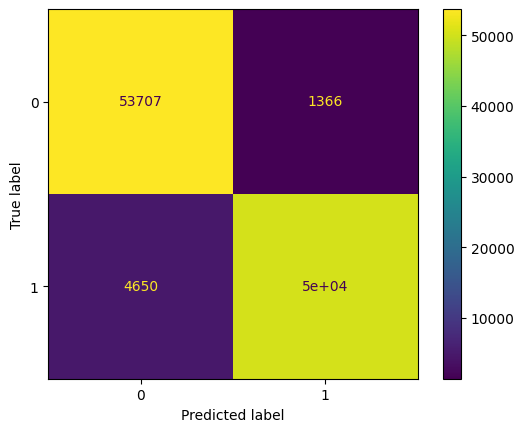

In [147]:
cm_display_o=m.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_over,display_labels=[0,1])
cm_display_o.plot()

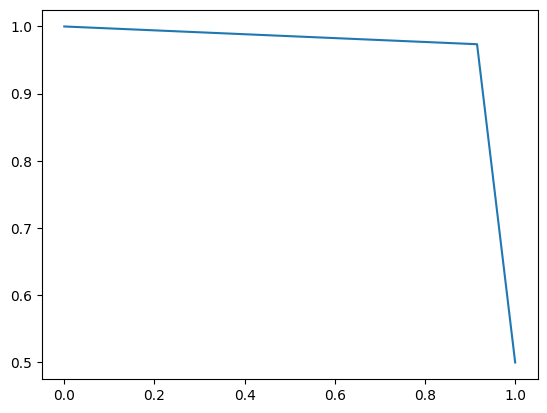

In [148]:
precision_o,recall_o,thresholds_o=precision_recall_curve(y_test_over,y_pred_over)
plt.plot(recall_o,precision_o)

In [149]:
auc(recall_o,precision_o)

0.9656453703392756

In [150]:
#Predicting for a random input
input_data=(-1.158233,	0.877737,	1.548718,	0.403034,	-0.407193,	0.095921,	0.592941,	-0.270533,	0.817739,	0.753074,	-0.822843,	0.538196,	1.345852,	-1.119670,	0.175121,	-0.451449,	-0.237033,	-0.038195,	0.803487,	0.408542,	-0.009431,	0.798278,	-0.137458,	0.141267,	-0.206010,	0.502292,	0.219422	,0.215153	,-0.073403) #this is a tuple

In [151]:
input_data_as_numpy_array= np.asarray(input_data) #this will convert the above tuple into a numpy array

In [152]:
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1) #reshape(1,-1) converts input_data_as_numpy_array into a 'single data point'

In [158]:
outcome=logr.predict(input_data_reshaped)
if outcome==0:
    print("Normal Transaction :)")
else:
    print("Fraudulent Transaction :(")

Normal Transaction :)


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [159]:
#OR

## Save the Model


logr1=LogisticRegression() # logr1 stores an instance
logr1.fit(x_over,y_over) # fitting it over the Oversampled data (say it's better than undersampled in this case)
import joblib
joblib.dump(logr1,"credit_card_fraud_detection_model") # just saying "credit_card_fraud_detection_model"
ccfd_model=joblib.load("credit_card_fraud_detection_model") # loading the model in ccfd_model (say)

In [ ]:
#Checking the model by passing values available in 5th row of the dataset
#storing the result in a new variable 'outcome'
#printing results in a lucid way

outcome=ccfd_model.predict([[-1.158233,	0.877737,	1.548718,	0.403034,	-0.407193,	0.095921,	0.592941,	-0.270533,	0.817739,	0.753074,	-0.822843,	0.538196,	1.345852,	-1.119670,	0.175121,	-0.451449,	-0.237033,	-0.038195,	0.803487,	0.408542,	-0.009431,	0.798278,	-0.137458,	0.141267,	-0.206010,	0.502292,	0.219422	,0.215153	,-0.073403	]])
if outcome==0:
    print("Normal Transaction :)")
else:
    print("Fraudulent Transaction :(")